<a href="https://colab.research.google.com/github/ShilpaVasista/Exploratory-Data-Analytics/blob/main/Simplified_eda_lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade pandas

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:

import pandas as pd
# Load dataset
emails = pd.read_csv("synthetic_emails.csv")
# Display first five rows
print(emails.head())
print(f"Rows: {emails.shape[0]}, Columns: {emails.shape[1]}")

2.2.2
  message_id                        date              from                to  \
0   MSG00000  2025-02-02 20:43:13.264090  user17@email.com  user46@email.com   
1   MSG00001  2025-02-13 14:05:13.264090  user40@email.com  user32@email.com   
2   MSG00002  2025-01-23 20:29:13.264090  user39@email.com  user36@email.com   
3   MSG00003  2025-02-03 09:55:13.264090  user50@email.com  user19@email.com   
4   MSG00004  2025-02-11 11:44:13.264090  user41@email.com   user4@email.com   

                 cc  bcc                  subject  \
0   user9@email.com  NaN           Project Update   
1               NaN  NaN  Urgent: Response Needed   
2               NaN  NaN           Security Alert   
3               NaN  NaN              Team Outing   
4  user46@email.com  NaN     Company Announcement   

                                            content  
0           Reminder: Submit your report by Friday.  
1                                               NaN  
2  The server maintenance is sch

In [ ]:
#Data Transformation

#a. Converting the Date Column

#Ensure the date column is in a proper datetime format.


emails['date'] = pd.to_datetime(emails['date'], errors='coerce')

In [ ]:
#Removing NaN Values

# b.Drop missing values efficiently.
print(f"Rows: {emails.shape[0]}, Columns: {emails.shape[1]}")


emails.dropna(subset=['date', 'to', 'content'], inplace=True)
print(f"Rows: {emails.shape[0]}, Columns: {emails.shape[1]}")

Rows: 10000, Columns: 8
Rows: 8574, Columns: 8


In [ ]:
# c.Applying Descriptive Statistics

#Use summary statistics to understand the dataset.

print(emails.describe(include='all'))

       message_id                           date              from  \
count        8574                           8574              8574   
unique       8574                            NaN                50   
top      MSG00000                            NaN  user21@email.com   
freq            1                            NaN               197   
mean          NaN  2025-01-30 05:04:54.726651136               NaN   
min           NaN     2025-01-15 05:51:13.264090               NaN   
25%           NaN  2025-01-22 17:22:58.264090112               NaN   
50%           NaN  2025-01-30 06:24:43.264090112               NaN   
75%           NaN  2025-02-06 14:04:58.264090112               NaN   
max           NaN     2025-02-14 05:41:13.264090               NaN   

                      to                cc              bcc         subject  \
count               8574              2548              879            8574   
unique                50                50               50            

In [ ]:
#Drop unnecessary columns for analysis.

print(f"Rows: {emails.shape[0]}, Columns: {emails.shape[1]}")
emails.drop(columns=['message_id', 'bcc', 'cc'], inplace=True, errors='ignore')
print(f"Rows: {emails.shape[0]}, Columns: {emails.shape[1]}")


Rows: 8574, Columns: 8
Rows: 8574, Columns: 5


In [ ]:
#Convert timestamps to a single timezone.

if emails['date'].dt.tz is not None:
    emails['date'] = emails['date'].dt.tz_localize(None)


In [ ]:
#a. Number of Emails

#Total count of emails.
print(f"Rows: {emails.shape[0]}, Columns: {emails.shape[1]}")
#Most straightforward and generally preferred way to get the number of rows
#print(len(emails))

Rows: 8574, Columns: 5


<Axes: title={'center': 'Emails Sent per Hour'}, xlabel='hour'>

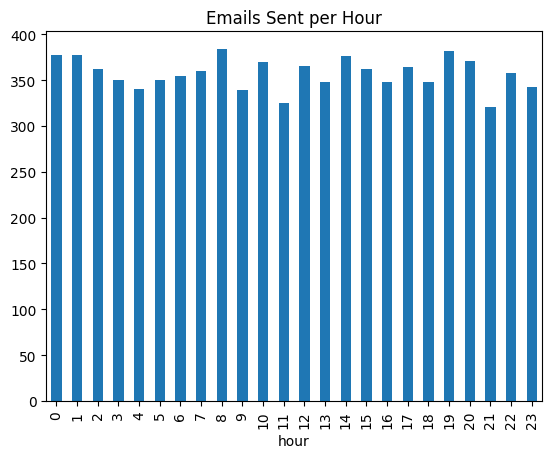

In [ ]:
#Time of Day Analysis

#Extract the hour from the timestamp and analyze trends.
#Extract the hour from the timestamp and analyze trends.

#The dataset's date column is converted to hours using .dt.hour.

#The .value_counts() method is used to count the frequency of each hour.

#.sort_index() ensures the hours are in ascending order.

#The results are visualized using a bar chart.

emails['hour'] = emails['date'].dt.hour
emails['hour'].value_counts().sort_index().plot(kind='bar', title='Emails Sent per Hour')

#This analysis helps identify peak email activity hours, which can be useful for optimizing email response strategies and understanding communication trends.


In [ ]:
#c. Average Emails per Day and Hour

#Compute daily and hourly averages.

emails_per_day = emails.resample('D', on='date').size()
print(emails_per_day)
print("Average Emails per Day:", emails_per_day.mean())


date
2025-01-15    226
2025-01-16    250
2025-01-17    288
2025-01-18    316
2025-01-19    292
2025-01-20    286
2025-01-21    276
2025-01-22    288
2025-01-23    268
2025-01-24    266
2025-01-25    315
2025-01-26    262
2025-01-27    270
2025-01-28    335
2025-01-29    271
2025-01-30    308
2025-01-31    273
2025-02-01    295
2025-02-02    305
2025-02-03    273
2025-02-04    284
2025-02-05    310
2025-02-06    278
2025-02-07    285
2025-02-08    311
2025-02-09    286
2025-02-10    265
2025-02-11    270
2025-02-12    279
2025-02-13    278
2025-02-14     65
Freq: D, dtype: int64
Average Emails per Day: 276.5806451612903


In [ ]:
from collections import Counter
import re

words = ' '.join(emails['content'].dropna()).lower()
word_counts = Counter(re.findall(r'\b[a-z]{3,}\b', words))
print("Most Common Words:", word_counts.most_common(10))


Most Common Words: [('the', 3661), ('urgent', 1250), ('response', 1250), ('needed', 1250), ('eod', 1250), ('please', 1227), ('find', 1227), ('invoice', 1227), ('attached', 1227), ('hope', 1225)]
